In [1]:
import pickle
import datetime
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.dates import DateFormatter

In [2]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [3]:
temp_store = {}

## API call to store temperature

In [4]:
sum = 0
cnt = 0
secSteps = 3600
URL = "http://api.openweathermap.org/data/2.5/forecast?id=1269843&appid=95e286bae5647877dbb924f3779736a8&units=imperial"
r = requests.get(url=URL)
data = r.json()
for ind in range(len(data['list'])):
    dt = data['list'][ind]['dt_txt']
    temp = data['list'][ind]['main']['temp']
    print(dt,temp)
    print('\n')
    sum += temp*3
    cnt += 3
    temp_store[dt] = temp
    dt = datetime.datetime.strptime(dt,'%Y-%m-%d %H:%M:%S')
    dt += datetime.timedelta(seconds=secSteps)
    temp_store[str(dt)] = temp
    dt += datetime.timedelta(seconds=secSteps)
    temp_store[str(dt)] = temp

avg_temp = sum/cnt

2020-04-20 09:00:00 98.53


2020-04-20 12:00:00 91.63


2020-04-20 15:00:00 89.65


2020-04-20 18:00:00 83.8


2020-04-20 21:00:00 81.25


2020-04-21 00:00:00 80.17


2020-04-21 03:00:00 87.8


2020-04-21 06:00:00 97.99


2020-04-21 09:00:00 101.93


2020-04-21 12:00:00 100.45


2020-04-21 15:00:00 92.89


2020-04-21 18:00:00 86.61


2020-04-21 21:00:00 84.54


2020-04-22 00:00:00 83.07


2020-04-22 03:00:00 91.35


2020-04-22 06:00:00 102.18


2020-04-22 09:00:00 105.22


2020-04-22 12:00:00 104.11


2020-04-22 15:00:00 94.87


2020-04-22 18:00:00 84.97


2020-04-22 21:00:00 81.16


2020-04-23 00:00:00 80.44


2020-04-23 03:00:00 88.18


2020-04-23 06:00:00 101.5


2020-04-23 09:00:00 104.85


2020-04-23 12:00:00 103.8


2020-04-23 15:00:00 94.73


2020-04-23 18:00:00 86.11


2020-04-23 21:00:00 82.58


2020-04-24 00:00:00 81.91


2020-04-24 03:00:00 91.36


2020-04-24 06:00:00 103.19


2020-04-24 09:00:00 106.47


2020-04-24 12:00:00 103.24


2020-04-24 15:00:00 96.17


2020-04-24 18

In [5]:
print(avg_temp)

92.61999999999996


In [6]:
def predict(data):
    test = pd.DataFrame([data], columns = ['ds']) 
    try:
        test['temp'] = temp_store[str(data)]
    except:
        test['temp'] = avg_temp
    val = model.predict(test)
    return np.exp(val['yhat'])

In [24]:
def plot():
    clear_output(wait=True)    
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(x,y)
    plt.xlabel('DateTime') 
    plt.ylabel('Predicted Value') 
    plt.title('Prediction over a time period') 
    ax.xaxis_date() 
    fig.autofmt_xdate()
    plt.show() 

In [25]:
x = []
y = []

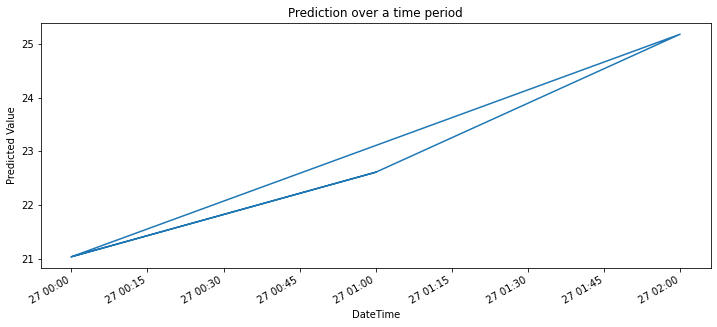

2020-04-27 01:00:00 0    22.609367
Name: yhat, dtype: float64


In [ ]:
def runDay(date,secSteps):    
    startDay = date.replace(hour= 0, minute= 0, second= 0)
    endDay   = date.replace(hour=23, minute=59, second=59)
    day = startDay
    while day <= endDay:
        x.append(day)
        val = predict(day)
        y.append(val)
        plot()
        print(day,val)
        day += datetime.timedelta(seconds=secSteps)

firstDate = datetime.datetime(2020,4,27,0,0,0)
lastDate  = datetime.datetime(2020,4,27,8,0,0)
daySteps  = 1
secSteps = 3600

date = firstDate
while date <= lastDate:
    NumberOfDay = date.timetuple()[7]
    runDay(date,secSteps)
    date += datetime.timedelta(days=daySteps)